<a href="https://colab.research.google.com/github/GUNDRUNIKHITHA/fmllab/blob/main/multi_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

In [77]:
data=pd.read_csv("50_Startups.csv")
data=data.drop('State',axis=1)
data

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [78]:
X=data.drop('Profit',axis=1).values
y=data['Profit'].values


In [79]:
data

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


<Axes: >

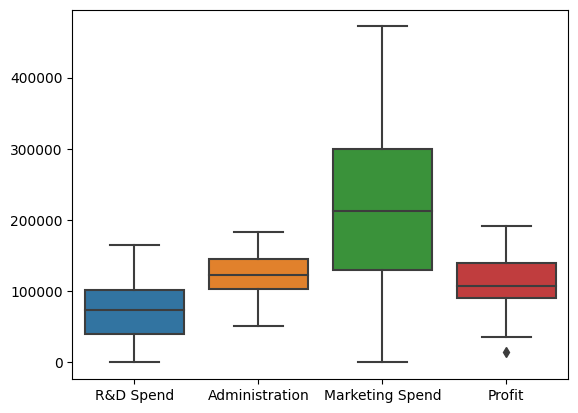

In [80]:
sns.boxplot(data)

In [81]:
qt1=data['Profit'].quantile(0.25)
qt2=data['Profit'].quantile(0.75)
q=qt2-qt1
q

49627.07499999998

In [82]:
up=qt2+1.5*q
down=qt1-1.5*q
up,down

(214206.58999999997, 15698.290000000023)

In [83]:
data=data[(data['Profit']>down) & (data['Profit']<up)]
data

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


<Axes: >

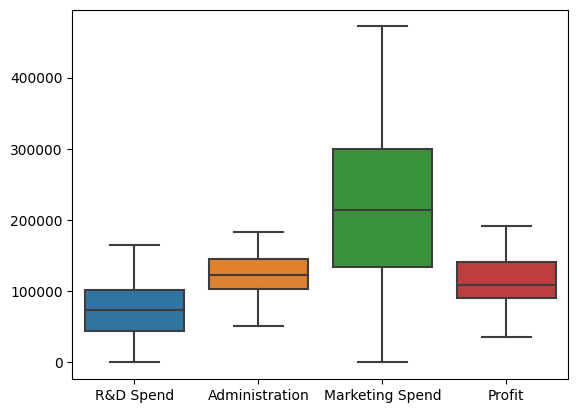

In [84]:
sns.boxplot(data)

In [85]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=44)

In [86]:
X_test.shape,X_train.shape

((13, 3), (37, 3))

In [87]:
reg =linear_model.LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [88]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
y_pred1 = reg.predict(X_train)
print(f'MAE = {mean_absolute_error(y_train, y_pred1)}')
print(f'MSE = {mean_squared_error(y_train, y_pred1)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_train, y_pred1))}')
print(f'R_2 = {r2_score(y_train, y_pred1)}')

MAE = 6844.443359648744
MSE = 84697148.65777306
RMSE = 9203.105381216335
R_2 = 0.9518948992217932


In [89]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
y_pred2=reg.predict(X_test)
print(f'MSE = {mean_absolute_error(y_test,y_pred2)}')
print(f'MSE = {mean_squared_error(y_test, y_pred2)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_test, y_pred2))}')
print(f'R_2 = {r2_score(y_test, y_pred2)}')

MSE = 6129.18482297304
MSE = 67786882.73104295
RMSE = 8233.278978089043
R_2 = 0.932518709512066
